# Load Packages and Dataset

In [1]:
# Load All Packages
import os
import pandas as pd
import numpy as np
from google.colab import drive
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Navigate to Directory
drive.mount('/content/drive')
# /content/drive/MyDrive/Data Glacier

os.chdir("./drive/MyDrive/Data Glacier")

Mounted at /content/drive


In [2]:
filepath = './Cab Industry Analysis/'

transaction = pd.read_csv(filepath+'Transaction_ID.csv')  # if add index_col=0, we remove index column
customer = pd.read_csv(filepath+'Customer_ID.csv')
city = pd.read_csv(filepath+'City.csv')
cab = pd.read_csv(filepath+'Cab_Data.csv')

In [3]:
transaction.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [ ]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [ ]:
transaction['Transaction ID'].nunique()

440098

In [ ]:
transaction['Customer ID'].nunique()

49171

In [4]:
customer.head(5)

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [5]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [6]:
customer['Customer ID'].nunique()

49171

In [ ]:
city.head(5)

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [ ]:
city['Users'] = city['Users'].str.replace(',','').astype(int)

In [ ]:
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 608.0+ bytes


In [7]:
city['City'].nunique()

20

In [8]:
cab.head(5)
# KM travelled: killow meters travalled

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,08-01-2016,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,06-01-2016,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,02-01-2016,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,07-01-2016,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,03-01-2016,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [18]:
# change the format of date of travel

cab['Date of Travel'] = pd.to_datetime(cab['Date of Travel'], format='%d-%m-%Y')
cab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Transaction ID  359392 non-null  int64         
 1   Date of Travel  359392 non-null  datetime64[ns]
 2   Company         359392 non-null  object        
 3   City            359392 non-null  object        
 4   KM Travelled    359392 non-null  float64       
 5   Price Charged   359392 non-null  float64       
 6   Cost of Trip    359392 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 19.2+ MB


In [19]:
cab['Transaction ID'].nunique()

359392

# Data Preprocessing

## Create Master dataset



*   First, merge Transaction and Customer Data as `tr_cus` dataset
*   Second, merge Cab and City data as `cab_city` dataset
*   Third, merge `tr_cus` dataset and `cab_city` dataset as `full` dataset




In [20]:
tr_cus = pd.merge(transaction, customer, on = 'Customer ID', how = 'outer')   # outer: keep all rows from both dataset
tr_cus.head(5)

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,29290,Card,Male,28,10813
1,10351127,29290,Cash,Male,28,10813
2,10412921,29290,Card,Male,28,10813
3,10000012,27703,Card,Male,27,9237
4,10320494,27703,Card,Male,27,9237


In [21]:
tr_cus.isnull().sum()

Transaction ID        0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

In [22]:
cab_city = pd.merge(cab, city, on = 'City', how = 'inner')   # outer: keep all rows from both dataset
cab_city.head(5)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,"814,885","24,701"
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,"814,885","24,701"
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,"814,885","24,701"
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,"814,885","24,701"
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,"814,885","24,701"


In [23]:
cab_city.isnull().sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
Population        0
Users             0
dtype: int64

In [24]:
type(cab_city['Transaction ID'][0])

numpy.int64

In [25]:
cab_city['Transaction ID'] = cab_city['Transaction ID'].astype(int)

In [26]:
full = pd.merge(tr_cus, cab_city, on = 'Transaction ID', how = 'inner')   # outer: keep all rows from both dataset
full.head(5)

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users
0,10000011,29290,Card,Male,28,10813,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,"814,885","24,701"
1,10351127,29290,Cash,Male,28,10813,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,"814,885","24,701"
2,10412921,29290,Card,Male,28,10813,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,"814,885","24,701"
3,10000012,27703,Card,Male,27,9237,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,"814,885","24,701"
4,10320494,27703,Card,Male,27,9237,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,"814,885","24,701"


In [27]:
# dispose the column name
full.columns = full.columns.str.replace(' ', '_')
full = full.rename(columns = {'Users_City': 'Total_Users_City'})

In [28]:
full['Profit_of_Trip'] = full['Price_Charged'] - full['Cost_of_Trip']
full['Price_per_KM'] = full['Price_Charged']/full['KM_Travelled']
full['Cost_per_KM'] = full['Cost_of_Trip']/full['KM_Travelled']

# Extract years and month
full['Year'] = full['Date_of_Travel'].dt.year
full['Month'] = full['Date_of_Travel'].dt.month

In [29]:
full.isnull().sum()

Transaction_ID        0
Customer_ID           0
Payment_Mode          0
Gender                0
Age                   0
Income_(USD/Month)    0
Date_of_Travel        0
Company               0
City                  0
KM_Travelled          0
Price_Charged         0
Cost_of_Trip          0
Population            0
Users                 0
Profit_of_Trip        0
Price_per_KM          0
Cost_per_KM           0
Year                  0
Month                 0
dtype: int64

In [30]:
full['Date_of_Travel'].nunique()

1095

In [31]:
full.head()

,Transaction_ID,Customer_ID,Payment_Mode,Gender,Age,Income_(USD/Month),Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Population,Users,Profit_of_Trip,Price_per_KM,Cost_per_KM,Year,Month
0,10000011,29290,Card,Male,28,10813,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,"814,885","24,701",57.3150,12.182266,10.30,2016,1
1,10351127,29290,Cash,Male,28,10813,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,"814,885","24,701",281.2772,22.859870,12.12,2018,7
2,10412921,29290,Card,Male,28,10813,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,"814,885","24,701",194.6480,18.614571,14.04,2018,11
3,10000012,27703,Card,Male,27,9237,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,"814,885","24,701",23.6660,12.526904,11.70,2016,1
4,10320494,27703,Card,Male,27,9237,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,"814,885","24,701",253.9808,19.821330,12.84,2018,4


In [ ]:
full.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 359392 entries, 2016-01-01 to 2018-01-01
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction_ID      359392 non-null  int64         
 1   Customer_ID         359392 non-null  int64         
 2   Payment_Mode        359392 non-null  object        
 3   Gender              359392 non-null  object        
 4   Age                 359392 non-null  int64         
 5   Income_(USD/Month)  359392 non-null  int64         
 6   Date_of_Travel      359392 non-null  datetime64[ns]
 7   Company             359392 non-null  object        
 8   City                359392 non-null  object        
 9   KM_Travelled        359392 non-null  float64       
 10  Price_Charged       359392 non-null  float64       
 11  Cost_of_Trip        359392 non-null  float64       
 12  Population          359392 non-null  object        
 13  Users        

In [ ]:
full['Date_of_Travel'].min()

Timestamp('2016-01-02 00:00:00')

# Exploratory Data Analysis

## Hypothesis



1.   Is there a seasonality appeared in cab industry (Demand & Profit)?
2.   Compare monthly profit? Does profit increase?
3.   How does price and cost change over years?
4.   How many users in each city are coverd by each company?
  *    Profit contribution of each city to different companies
5.   For different age groups, what company do they choose?
  *    Profit contribution of each age group to different companies
6. For different genders, what cab company do they choose?
  *    Profit contribution of each gender group to different companies
7. For different income groups, what cab company do they choose?
  *    Profit contribution of each income group to different companies





## 1) Is there a seasonality in demand and profit?

In [ ]:
demand = full.groupby(['Year', 'Month', 'Company']).size().reset_index(name='Demand')
demand

,Year,Month,Company,Demand
0,2016,1,Pink Cab,927
1,2016,1,Yellow Cab,3719
2,2016,2,Pink Cab,1050
3,2016,2,Yellow Cab,4674
4,2016,3,Pink Cab,1231
...,...,...,...,...
67,2018,10,Yellow Cab,9727
68,2018,11,Pink Cab,3897
69,2018,11,Yellow Cab,11230
70,2018,12,Pink Cab,3800


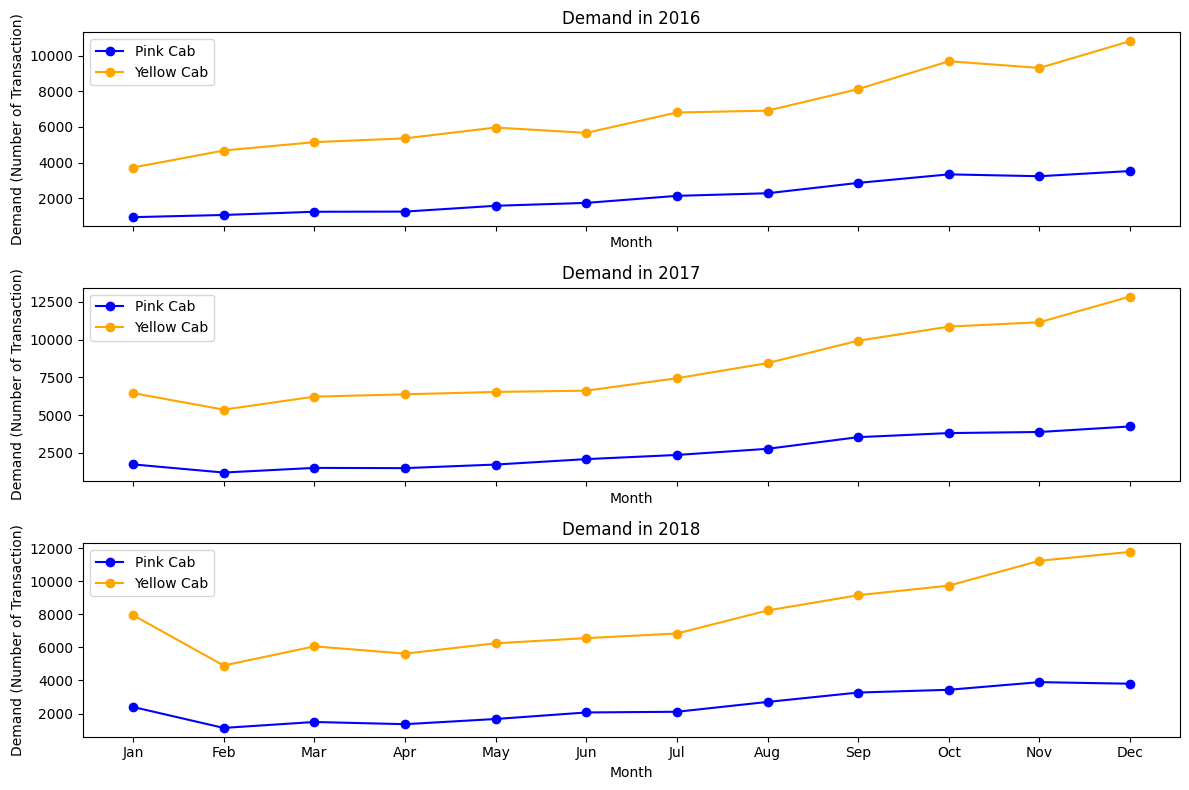

In [ ]:
# Plotting the demand
years = demand['Year'].unique()
companies = demand['Company'].unique()

fig, axes = plt.subplots(nrows=len(years), ncols=1, figsize=(12, 8), sharex=True)

colors = {'Pink Cab': 'blue', 'Yellow Cab': 'orange'}

for i, year in enumerate(years):
    ax = axes[i]
    for company in companies:
        subset = demand[(demand['Year'] == year) & (demand['Company'] == company)]
        ax.plot(subset['Month'], subset['Demand'], marker='o', label=company, color=colors[company])

    ax.set_xticks(range(1, 13))
    ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    ax.set_title(f'Demand in {year}')
    ax.set_xlabel('Month')
    ax.set_ylabel('Demand (Number of Transaction)')
    ax.legend()

plt.tight_layout()
plt.show()



*   The demand (number of transactions) of both cab companies has an upward trend within a year.
*   Demand peaks at the end of the year and falls back at the first few months of the year.



In [ ]:
monthly_profit = full.groupby(['Year', 'Month', 'Company'])['Profit_of_Trip'].sum().reset_index(name='Monthly Profit')
monthly_profit

,Year,Month,Company,Monthly Profit
0,2016,1,Pink Cab,73952.86
1,2016,1,Yellow Cab,836308.11
2,2016,2,Pink Cab,87475.54
3,2016,2,Yellow Cab,1009169.17
4,2016,3,Pink Cab,87801.18
...,...,...,...,...
67,2018,10,Yellow Cab,1273756.25
68,2018,11,Pink Cab,239337.73
69,2018,11,Yellow Cab,1416933.33
70,2018,12,Pink Cab,285605.93


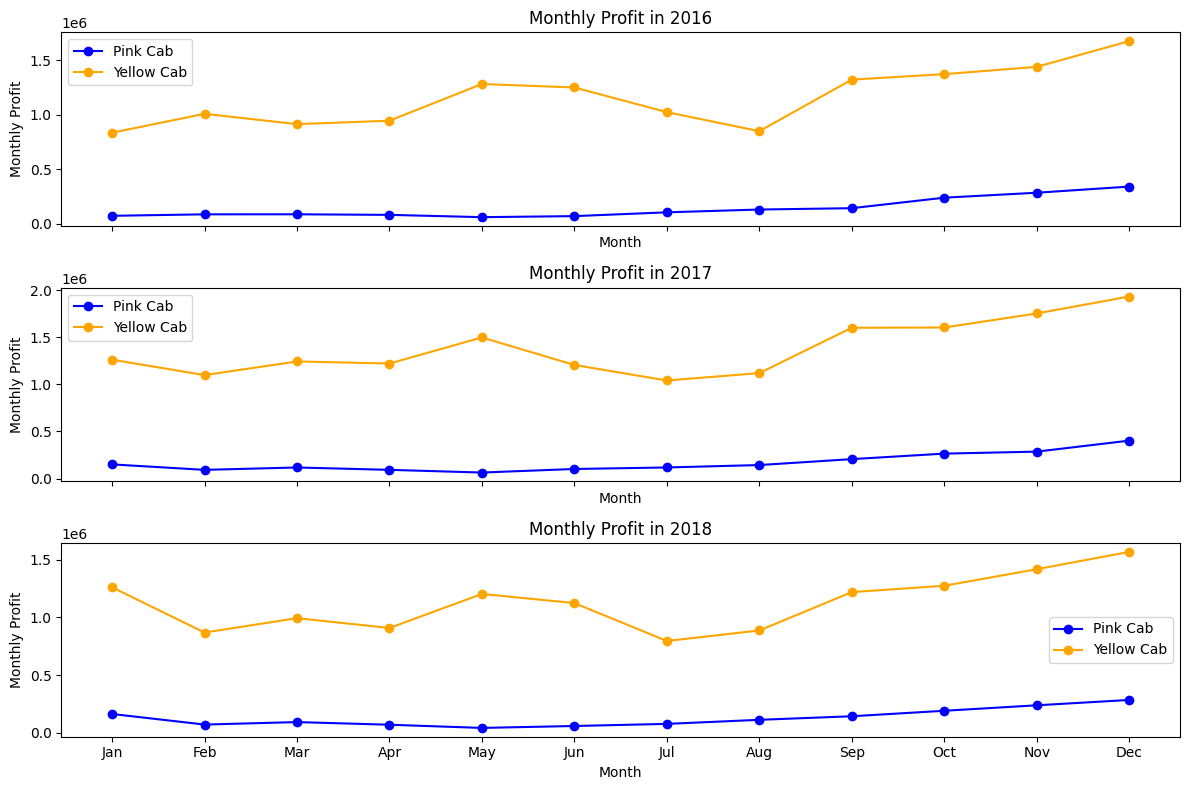

In [ ]:
# Plotting the profit
years = monthly_profit['Year'].unique()
companies = monthly_profit['Company'].unique()

fig, axes = plt.subplots(nrows=len(years), ncols=1, figsize=(12, 8), sharex=True)

colors = {'Pink Cab': 'blue', 'Yellow Cab': 'orange'}

for i, year in enumerate(years):
    ax = axes[i]
    for company in companies:
        subset = monthly_profit[(monthly_profit['Year'] == year) & (monthly_profit['Company'] == company)]
        ax.plot(subset['Month'], subset['Monthly Profit'], marker='o', label=company, color=colors[company])

    ax.set_xticks(range(1, 13))
    ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    ax.set_title(f'Monthly Profit in {year}')
    ax.set_xlabel('Month')
    ax.set_ylabel('Monthly Profit')
    ax.legend()

plt.tight_layout()
plt.show()



*   There is a quarterly trend of profit in both companies.
*   Demand will increase in second and fourth quarter, but decreased in first and third quarter.



## 2) Compare Yearly Profit? Does Profit Increase?

In [ ]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
yearly_profit = pd.pivot_table(data = full,
                               index = 'Company',
                               columns = 'Year',
                               values = 'Profit_of_Trip',
                               aggfunc = np.sum)
yearly_profit

Year,2016,2017,2018
Company,,,
Pink Cab,1713511.22,2033654.91,1560162.19
Yellow Cab,13926995.43,16575977.97,13517399.77


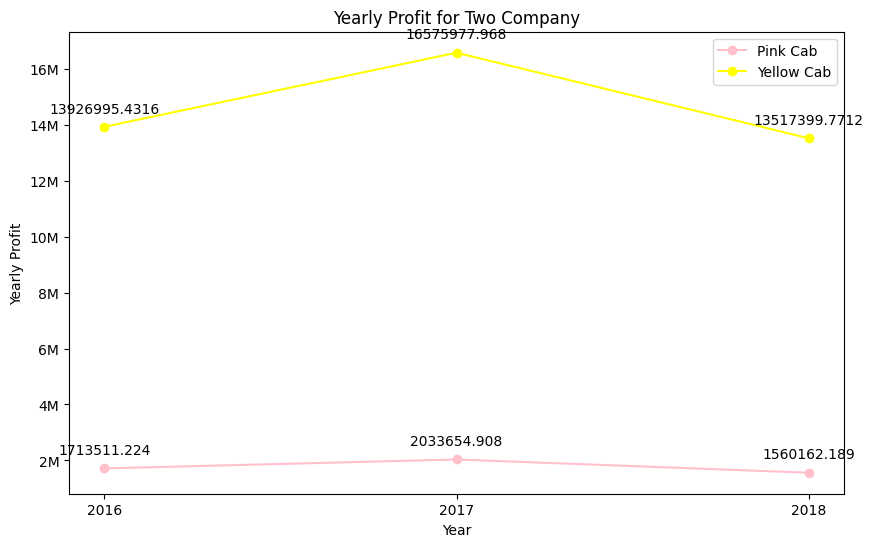

In [ ]:
from matplotlib.ticker import FuncFormatter

# Define a function to format y-axis labels in millions
def millions_formatter(x, pos):
    return '{:.0f}M'.format(x / 1000000)

plt.figure(figsize=(10,6))
plt.plot(yearly_profit.columns, yearly_profit.loc['Pink Cab'], marker='o', label='Pink Cab', color = 'pink')
plt.plot(yearly_profit.columns, yearly_profit.loc['Yellow Cab'], marker='o', label='Yellow Cab', color = 'yellow')

for x, y in zip(yearly_profit.columns, yearly_profit.loc['Pink Cab']):
    plt.annotate(y, (x, y), textcoords="offset points", xytext=(0,10), ha='center')

for x, y in zip(yearly_profit.columns, yearly_profit.loc['Yellow Cab']):
    plt.annotate(y, (x, y), textcoords="offset points", xytext=(0,10), ha='center')

# Set the labels and title
plt.xlabel('Year')
plt.ylabel('Yearly Profit')
plt.title('Yearly Profit for Two Company')
plt.xticks(range(2016, 2019))
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.legend()
plt.show()



*   The yearly profit of both companies increases in 2017 but decreases in 2018.
*   Profit of Yellow Cab is significantly larger than profit of Pink Cab, it is almost 7 times of Pink Cab.



## 3) How does price and cost change over years?

In [ ]:
yearly_price_change = pd.pivot_table(data = full,
                               index = 'Company',
                               columns = 'Year',
                               values = 'Price_per_KM',
                               aggfunc = np.mean)
yearly_price_change

Year,2016,2017,2018
Company,,,
Pink Cab,14.02,13.96,13.35
Yellow Cab,20.69,20.70,19.56


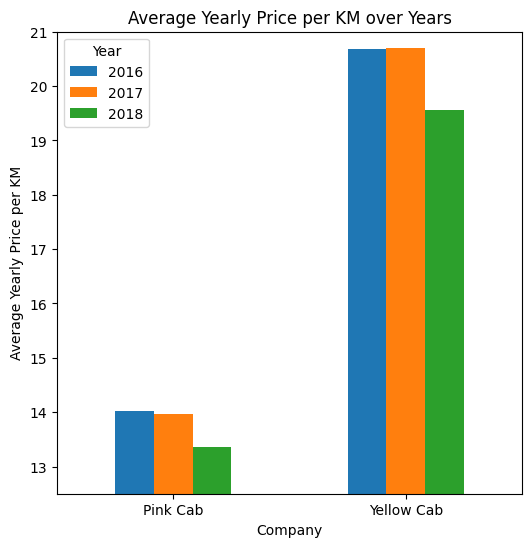

In [ ]:
ax = yearly_price_change.plot(kind='bar', figsize=(6, 6))

plt.xlabel('Company')
plt.ylabel('Average Yearly Price per KM')
plt.title('Average Yearly Price per KM over Years')
plt.xticks(rotation=0)
plt.ylim(12.5, 21)     # Set y-axis range
plt.legend(title='Year')
plt.show()


In [ ]:
yearly_cost_change = pd.pivot_table(data = full,
                               index = 'Company',
                               columns = 'Year',
                               values = 'Cost_per_KM',
                               aggfunc = np.mean)
yearly_cost_change

Year,2016,2017,2018
Company,,,
Pink Cab,10.99,11.00,11.00
Yellow Cab,13.20,13.20,13.20


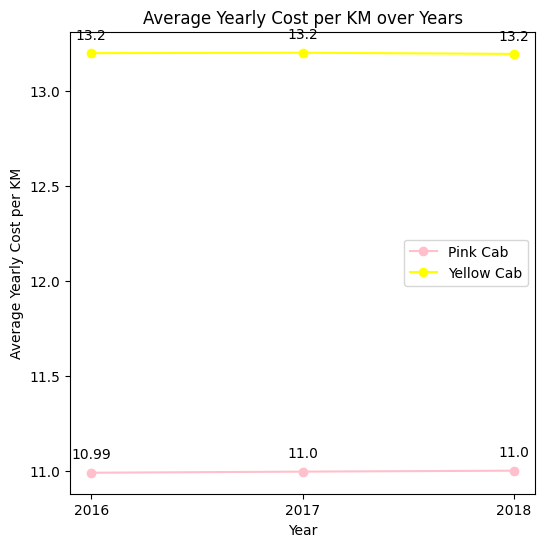

In [ ]:
plt.figure(figsize=(6,6))
plt.plot(yearly_cost_change.columns, yearly_cost_change.loc['Pink Cab'], marker='o', label='Pink Cab', color = 'pink')
plt.plot(yearly_cost_change.columns, yearly_cost_change.loc['Yellow Cab'], marker='o', label='Yellow Cab', color = 'yellow')

for x, y in zip(yearly_cost_change.columns, yearly_cost_change.loc['Pink Cab']):
    plt.annotate(round(y, 2), (x, y), textcoords="offset points", xytext=(0,10), ha='center')

for x, y in zip(yearly_cost_change.columns, yearly_cost_change.loc['Yellow Cab']):
    plt.annotate(round(y, 2), (x, y), textcoords="offset points", xytext=(0,10), ha='center')

# Set the labels and title
plt.xlabel('Year')
plt.ylabel('Average Yearly Cost per KM')
plt.title('Average Yearly Cost per KM over Years')
plt.xticks(range(2016, 2019))
plt.legend()
plt.show()



*   The cost per kilometer remains unchanged from 2916-2018, but the price charged per kilometer decreases, especially in year 2018.
*   It may explain why the yearly profit of both companies in year 2018 decreases.



## 4) How many users in each city are covered by each company?

In [ ]:
city_users_coverage = full.groupby(['City', 'Company'])['Customer_ID'].nunique().unstack(fill_value=0)
pink = np.array(city_users_coverage['Pink Cab'])
yellow = np.array(city_users_coverage['Yellow Cab'])

new_city = city.sort_values(by = 'City')
new_city = new_city[new_city['City'] != 'SAN FRANCISCO CA']
new_city['Pink Cab'] = pink
new_city['Yellow Cab'] = yellow
new_city['Pink Coverage %'] = (new_city['Pink Cab']/new_city['Users'])*100
new_city['Yellow Coverage %'] = (new_city['Yellow Cab']/new_city['Users'])*100
new_city['Total Coverage %'] = new_city['Pink Coverage %'] + new_city['Yellow Coverage %']
new_city = new_city.sort_values(by='Total Coverage %', ascending=False).reset_index(drop=True)
new_city

,City,Population,Users,Pink Cab,Yellow Cab,Pink Coverage %,Yellow Coverage %,Total Coverage %
0,PITTSBURGH PA,"542,085",3643,604,574,16.58,15.76,32.34
1,PHOENIX AZ,"943,999",6133,763,994,12.44,16.21,28.65
2,TUCSON AZ,"631,442",5712,684,934,11.97,16.35,28.33
3,SACRAMENTO CA,"545,776",7044,1078,880,15.30,12.49,27.80
4,NASHVILLE TN,"327,225",9270,1356,965,14.63,10.41,25.04
5,DENVER CO,"754,233",12421,1145,1681,9.22,13.53,22.75
6,ORANGE COUNTY,"1,030,185",12994,1198,1712,9.22,13.18,22.39
7,AUSTIN TX,"698,371",14978,1354,1914,9.04,12.78,21.82
8,MIAMI FL,"1,339,155",17675,1480,2334,8.37,13.21,21.58
9,SEATTLE WA,"671,238",25063,1790,2486,7.14,9.92,17.06


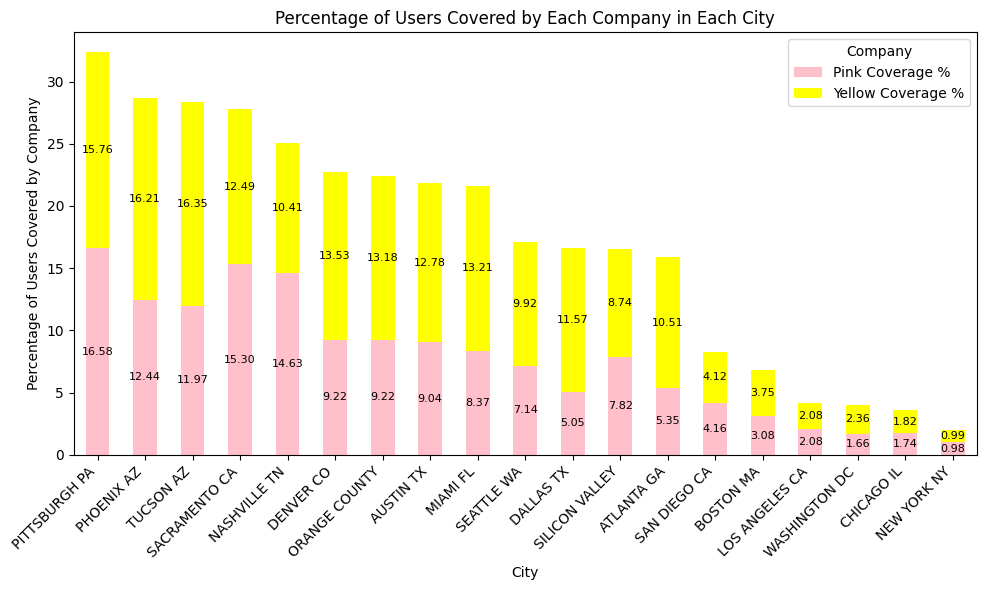

In [ ]:
ax = new_city[['Pink Coverage %', 'Yellow Coverage %']].plot(kind='bar', stacked=True, figsize=(10, 6),
                                                         color = ['pink', 'yellow'])
ax.set_xlabel('City')
ax.set_ylabel('Percentage of Users Covered by Company')
ax.set_title('Percentage of Users Covered by Each Company in Each City')
ax.set_xticks(range(len(new_city)))
ax.set_xticklabels(new_city['City'], rotation=45, ha='right')
ax.legend(title='Company')

# Add value annotations to the bars
for i in range(len(new_city)):
    pink_value = new_city.loc[i, 'Pink Coverage %']
    yellow_value = new_city.loc[i, 'Yellow Coverage %']

    # Annotate Pink Coverage
    ax.text(i, pink_value / 2, f'{pink_value:.2f}', ha='center', va='center', color='black', fontsize=8)
    # Annotate Yellow Coverage
    ax.text(i, pink_value + yellow_value / 2, f'{yellow_value:.2f}', ha='center', va='center', color='black', fontsize=8)

plt.tight_layout()
plt.show()



*   Yellow Cab has higher user coverage in 16 cities than Pink Cab.
*   Pink cab has higher user coverage in Pittsburgh PA, Sacramento CA, and Nashville TN.



### Profit contribution of each city to different company


In [ ]:
city_profit = full.groupby(['City', 'Company'])['Profit_of_Trip'].sum().unstack(fill_value=0)
pink = np.array(city_profit['Pink Cab'])
yellow = np.array(city_profit['Yellow Cab'])

new_city['Pink Profit'] = pink
new_city['Yellow Profit'] = yellow

total_pink_profit = new_city['Pink Profit'].sum()
total_yellow_profit = new_city['Yellow Profit'].sum()

# Calculate the percentage contribution of each city to the total profit
new_city['Pink Profit %'] = (new_city['Pink Profit'] / total_pink_profit) * 100
new_city['Yellow Profit %'] = (new_city['Yellow Profit'] / total_yellow_profit) * 100
new_city

,City,Population,Users,Pink Cab,Yellow Cab,Pink Coverage %,Yellow Coverage %,Total Coverage %,Pink Profit,Yellow Profit,Pink Profit %,Yellow Profit %
0,PITTSBURGH PA,"542,085",3643,604,574,16.58,15.76,32.34,96050.08,746382.81,1.81,1.70
1,PHOENIX AZ,"943,999",6133,763,994,12.44,16.21,28.65,147445.29,379255.74,2.78,0.86
2,TUCSON AZ,"631,442",5712,684,934,11.97,16.35,28.33,262001.70,1506717.57,4.94,3.42
3,SACRAMENTO CA,"545,776",7044,1078,880,15.30,12.49,27.80,318722.49,3068590.93,6.01,6.97
4,NASHVILLE TN,"327,225",9270,1356,965,14.63,10.41,25.04,24730.11,1104003.15,0.47,2.51
5,DENVER CO,"754,233",12421,1145,1681,9.22,13.53,22.75,40584.94,357000.07,0.76,0.81
6,ORANGE COUNTY,"1,030,185",12994,1198,1712,9.22,13.18,22.39,1125732.06,3285976.58,21.21,7.46
7,AUSTIN TX,"698,371",14978,1354,1914,9.04,12.78,21.82,162301.19,596000.05,3.06,1.35
8,MIAMI FL,"1,339,155",17675,1480,2334,8.37,13.21,21.58,64284.53,85247.68,1.21,0.19
9,SEATTLE WA,"671,238",25063,1790,2486,7.14,9.92,17.06,1511474.39,26451080.77,28.48,60.09


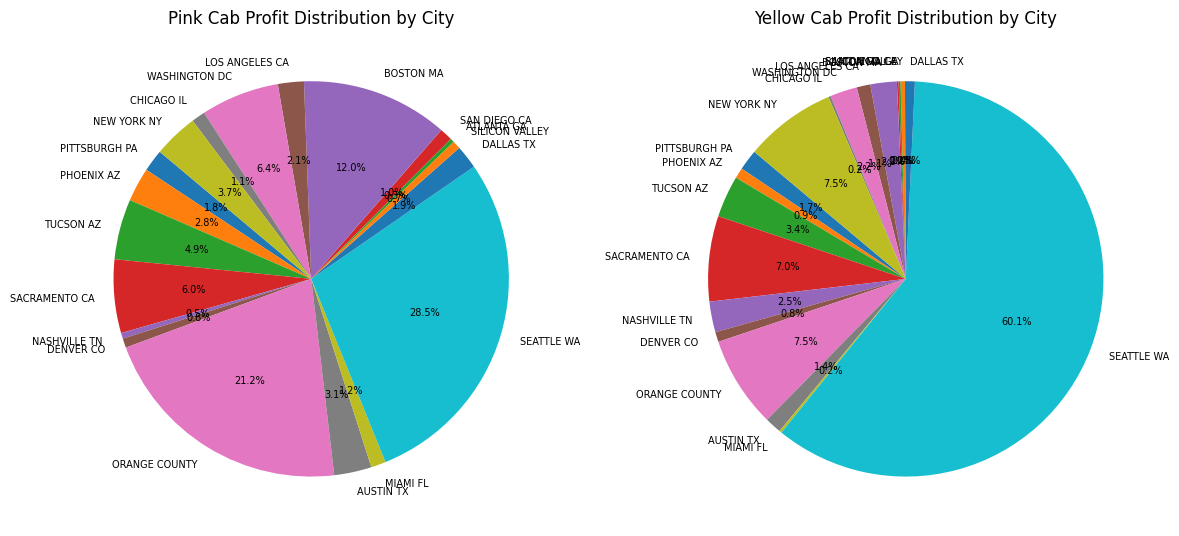

In [ ]:
# Create explode values for better visibility
explode = np.zeros(len(new_city))
explode[0] = 0.1

# Plot the pie charts
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Pink Cab
axs[0].pie(new_city['Pink Profit %'], labels=new_city['City'], autopct='%1.1f%%', startangle=140, textprops={'fontsize': 7})
axs[0].set_title('Pink Cab Profit Distribution by City')

# Yellow Cab
axs[1].pie(new_city['Yellow Profit %'], labels=new_city['City'], autopct='%1.1f%%', startangle=140, textprops={'fontsize': 7})
axs[1].set_title('Yellow Cab Profit Distribution by City')

plt.tight_layout()
plt.show()



*   The top 4 profit contribution cities for Pink Cab is Seattle WA, Orange County, Boston MA, and Washington DC.
*   The top 4 profit contribution cities for Yellow Cab is Seattle WA, Orange County, New York NY, and Sacramento CA. Notably, more than half of yearly profit in Yellow Cab is from Seattle WA.



## 5) For different age groups, what cab company do they choose?

In [32]:
# Define age bins and labels
bins = [18, 25, 40, 60, float('inf')]
labels = ['18-25', '26-40', '41-60', '60+']

# Create age groups
full['Age_Group'] = pd.cut(full['Age'], bins=bins, labels=labels, right=False)

customer_age_groups = full.groupby(['Year', 'Company', 'Age_Group'])['Customer_ID'].nunique().reset_index()
customer_age_groups.rename(columns={'Customer_ID': 'Number_Customers'}, inplace=True)
customer_age_groups

,Year,Company,Age_Group,Number_Customers
0,2016,Pink Cab,18-25,3763
1,2016,Pink Cab,26-40,7891
2,2016,Pink Cab,41-60,3910
3,2016,Pink Cab,60+,1097
4,2016,Yellow Cab,18-25,5823
5,2016,Yellow Cab,26-40,12348
6,2016,Yellow Cab,41-60,6117
7,2016,Yellow Cab,60+,1649
8,2017,Pink Cab,18-25,4325
9,2017,Pink Cab,26-40,8771


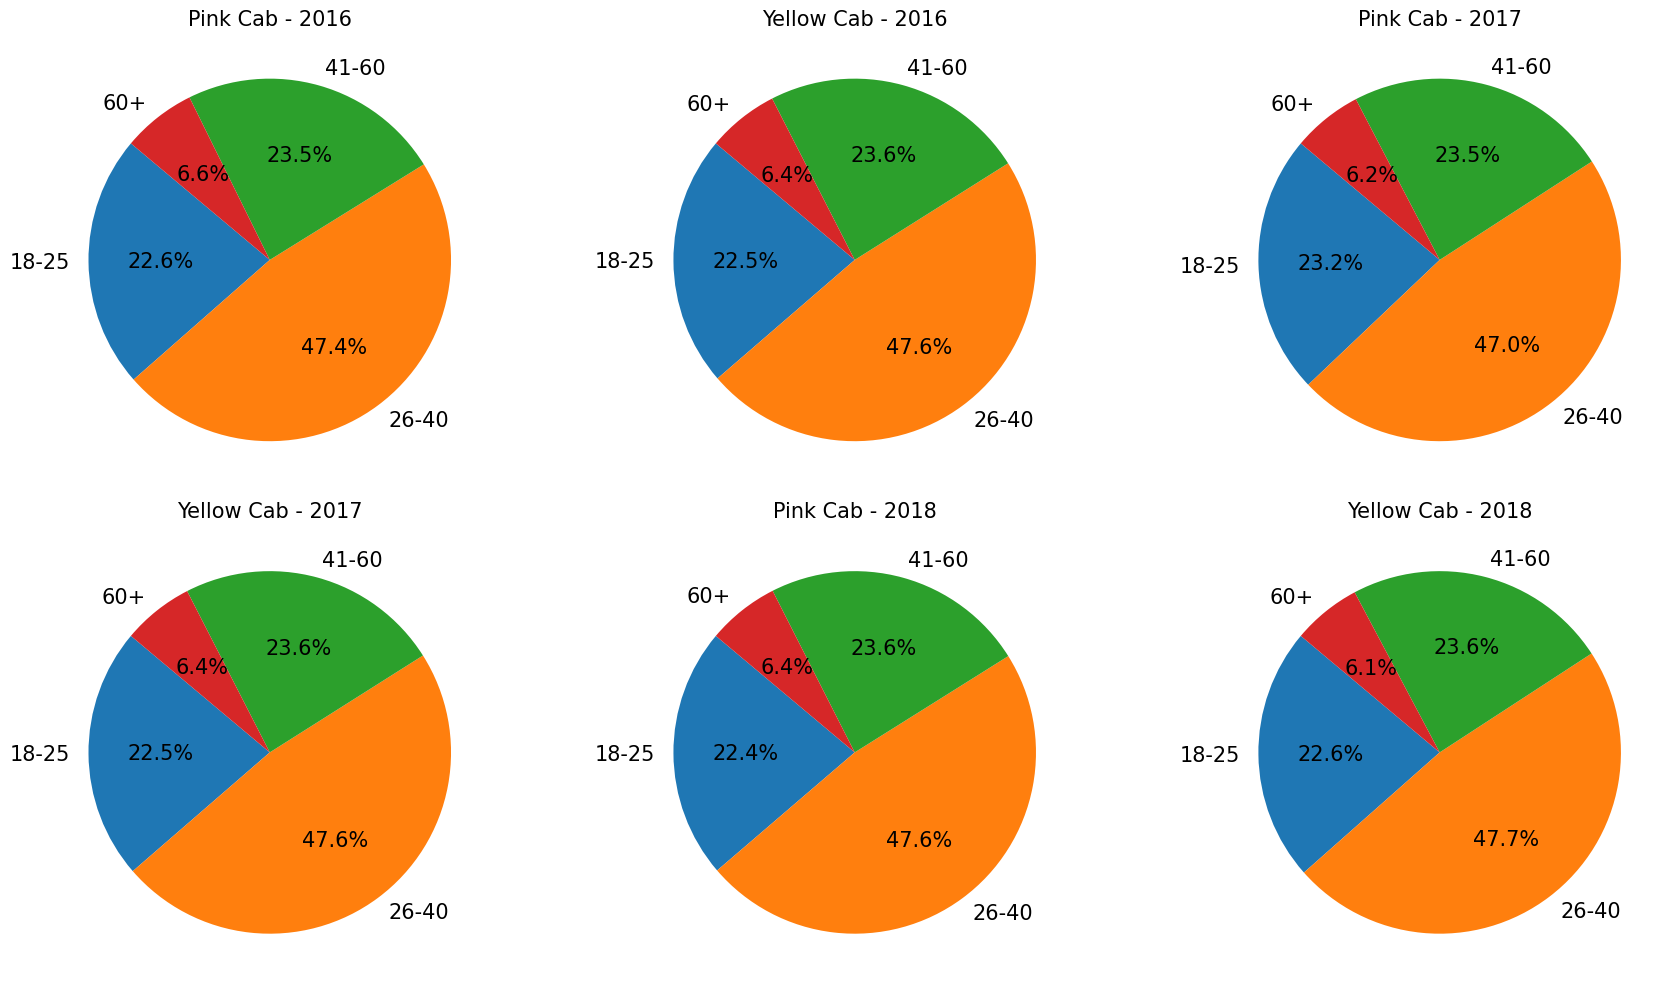

In [ ]:
pivot_table = customer_age_groups.pivot_table(index=['Year', 'Company'],
                                              columns='Age_Group',
                                              values='Number_Customers',
                                              fill_value=0)

fig, axs = plt.subplots(2, 3, figsize=(18, 10))

axs = axs.flatten()
years = full['Year'].unique()
companies = full['Company'].unique()

for i, (year, company) in enumerate(pivot_table.index):
    # Get the data for the current year and company
    data = pivot_table.loc[(year, company)]

    axs[i].pie(data, labels=data.index, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 15})
    axs[i].set_title(f'{company} - {year}', fontsize = 15)

plt.tight_layout()
plt.show()

In [ ]:
customer_age_groups1 = full.groupby(['Year', 'Age_Group', 'Company'])['Customer_ID'].nunique().reset_index()

# Rename the column for better understanding
customer_age_groups1.rename(columns={'Customer_ID': 'Number_Customers'}, inplace=True)

# Reshape the data for better readability
pivot_table = customer_age_groups1.pivot_table(index=['Year', 'Age_Group'],
                                               columns='Company',
                                               values='Number_Customers',
                                               fill_value=0)

# Display the result
print(pivot_table)

Company         Pink Cab  Yellow Cab
Year Age_Group                      
2016 18-25          3763        5823
     26-40          7891       12348
     41-60          3910        6117
     60+            1097        1649
2017 18-25          4325        6246
     26-40          8771       13231
     41-60          4384        6546
     60+            1163        1766
2018 18-25          4121        6220
     26-40          8764       13091
     41-60          4336        6478
     60+            1179        1681


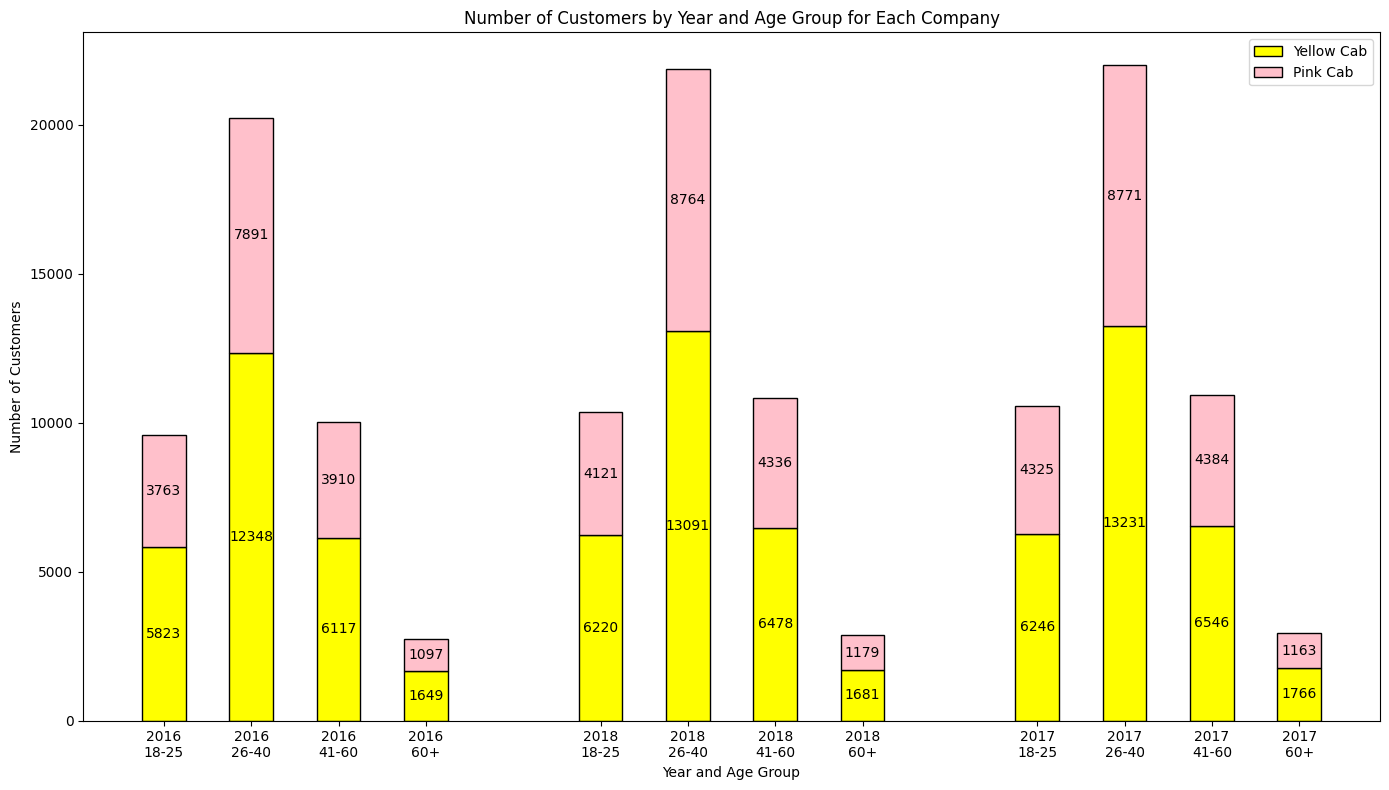

In [ ]:
# Plotting
fig, ax = plt.subplots(figsize=(14, 8))

colors = {'Pink Cab': 'pink', 'Yellow Cab': 'yellow'}

years = full['Year'].unique()
age_groups = labels

bar_width = 0.5
bar_positions = []

# Loop over each year and plot the bars for each age group
for i, year in enumerate(years):
    for j, age_group in enumerate(age_groups):
        x_position = i * (len(age_groups) + 1) + j  # calculate the x position
        bar_positions.append(x_position)

        height_yellow = pivot_table.loc[(year, age_group), 'Yellow Cab'] if (year, age_group) in pivot_table.index else 0
        height_pink = pivot_table.loc[(year, age_group), 'Pink Cab'] if (year, age_group) in pivot_table.index else 0

        # Plot bars for Yellow Cab (bottom part)
        ax.bar(x_position, height_yellow, width=bar_width, color=colors['Yellow Cab'], edgecolor='black')
        # Plot bars for Pink Cab (stacked on top)
        ax.bar(x_position, height_pink, width=bar_width, color=colors['Pink Cab'], bottom=height_yellow, edgecolor='black')

        # Annotate values on the bars
        if height_yellow > 0:
            ax.text(x_position, height_yellow / 2, str(height_yellow), ha='center', va='center')
        if height_pink > 0:
            ax.text(x_position, height_yellow + height_pink / 2, str(height_pink), ha='center', va='center')

# Set the labels for the x-axis
ax.set_xticks([i * (len(age_groups) + 1) + len(age_groups) / 2 - 0.5 for i in range(len(years))])
ax.set_xticklabels([str(year) for year in years])

# Add custom x-tick labels for each bar
ax.set_xticks(bar_positions)
custom_labels = [f'{year}\n{age_group}' for year in years for age_group in age_groups]
ax.set_xticklabels(custom_labels)

# Set labels and title
ax.set_xlabel('Year and Age Group')
ax.set_ylabel('Number of Customers')
ax.set_title('Number of Customers by Year and Age Group for Each Company')
ax.legend(['Yellow Cab', 'Pink Cab'])

plt.tight_layout()
plt.show()



*   The Age of customers are divided in four groups: 18-25, 26-40, 41-60, and 60 +.
*   Yellow Cab are more popular in all age groups than Pink Cab.



### Profit contribution of each age group to different company

In [ ]:
profit_age_groups = full.groupby(['Year', 'Age_Group', 'Company'])['Profit_of_Trip'].sum().reset_index()

total_profit = full.groupby(['Year', 'Company'])['Profit_of_Trip'].sum().reset_index()
total_profit.rename(columns={'Profit_of_Trip': 'Total_Profit'}, inplace=True)

# Merge the total profit with the profit by age group
merged_profit = profit_age_groups.merge(total_profit, on=['Year', 'Company'])

# Calculate the contribution of each age group to the total profit
merged_profit['Contribution'] = merged_profit['Profit_of_Trip'] / merged_profit['Total_Profit']

# Sort the results
result = merged_profit.sort_values(by=['Year', 'Company', 'Age_Group']).reset_index(drop=True)
result

,Year,Age_Group,Company,Profit_of_Trip,Total_Profit,Contribution
0,2016,18-25,Pink Cab,379665.73,1713511.22,0.22
1,2016,26-40,Pink Cab,820006.07,1713511.22,0.48
2,2016,41-60,Pink Cab,397979.21,1713511.22,0.23
3,2016,60+,Pink Cab,115860.22,1713511.22,0.07
4,2016,18-25,Yellow Cab,3163500.53,13926995.43,0.23
5,2016,26-40,Yellow Cab,6637787.49,13926995.43,0.48
6,2016,41-60,Yellow Cab,3289022.15,13926995.43,0.24
7,2016,60+,Yellow Cab,836685.27,13926995.43,0.06
8,2017,18-25,Pink Cab,485054.41,2033654.91,0.24
9,2017,26-40,Pink Cab,949443.31,2033654.91,0.47


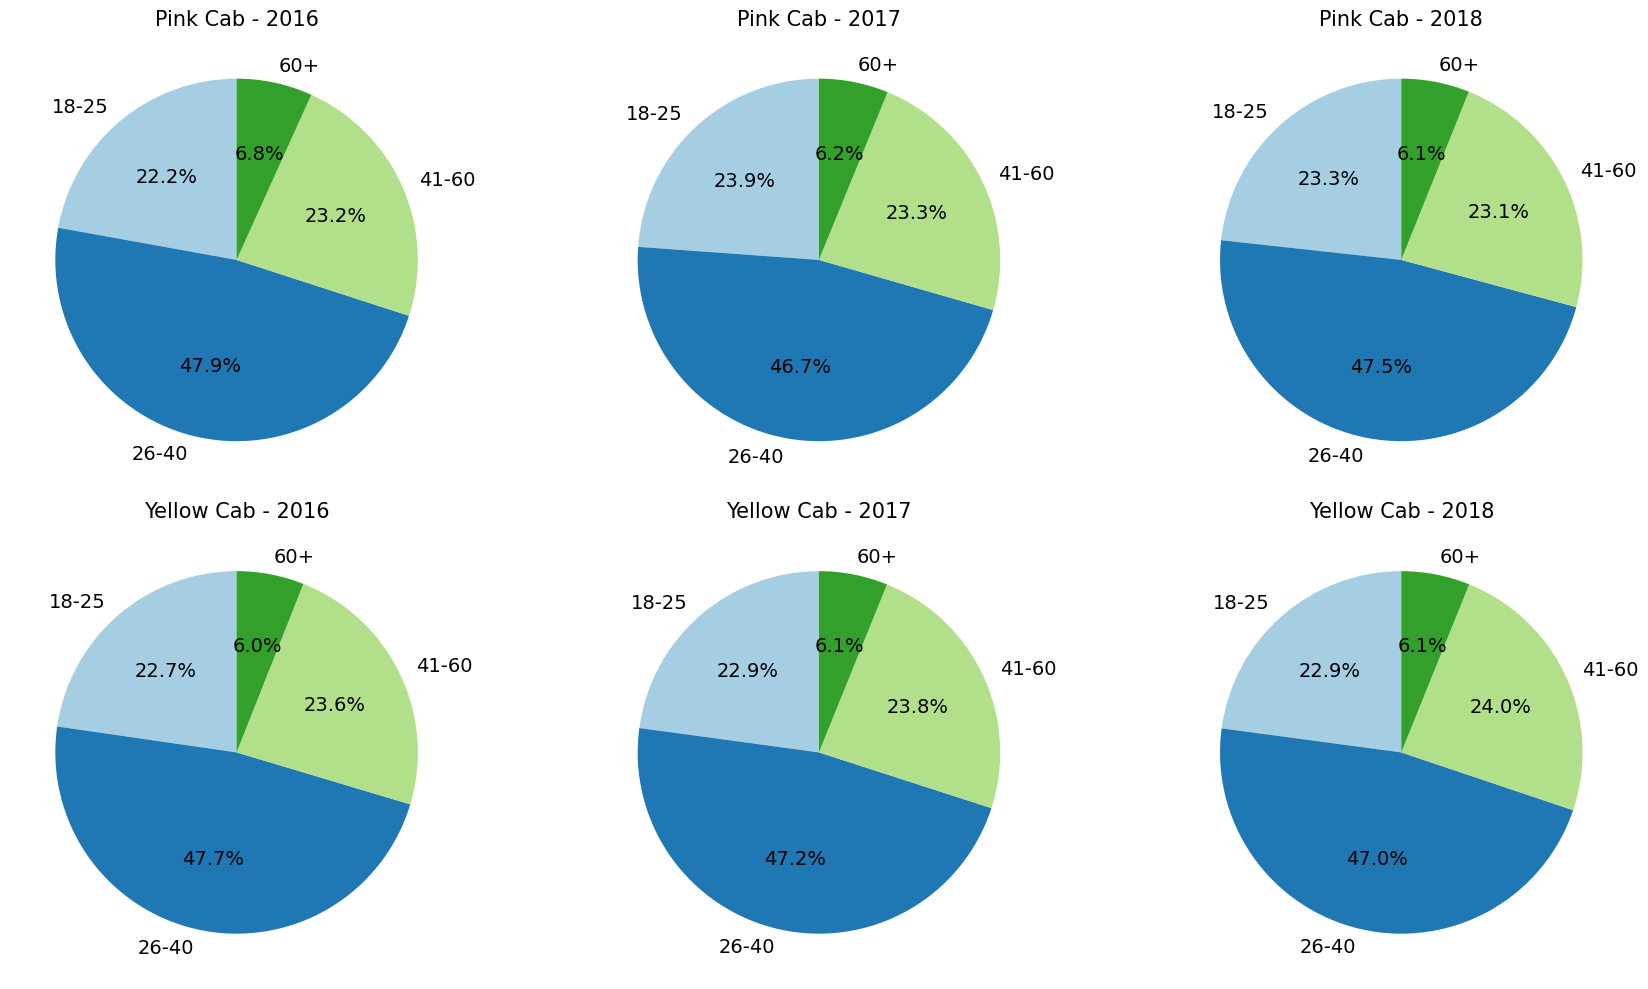

In [ ]:
pivot_table = result.pivot_table(index=['Year', 'Company'],
                                 columns='Age_Group',
                                 values='Contribution',
                                 fill_value=0)

# Plotting
fig, axs = plt.subplots(2, 3, figsize=(18, 10))

companies = ['Pink Cab', 'Yellow Cab']
years = [2016, 2017, 2018]
age_groups = labels

for i, company in enumerate(companies):
    for j, year in enumerate(years):
        ax = axs[i, j]
        contributions = pivot_table.loc[(year, company)]
        contributions.plot(kind='pie', labels=contributions.index, autopct='%1.1f%%',
                           ax=ax, startangle=90,
                           colors=plt.cm.Paired.colors,
                           textprops={'fontsize': 14})
        ax.set_ylabel('')
        ax.set_title(f'{company} - {year}', fontsize = 15)

plt.tight_layout()
plt.show()



*   The profit contribution distribution of all age groups is similar in both companies.
*   Pink Cab has less profit from 60 + aged customers and more profit from 26-40 aged customers over years.
*   Yellow Cab has lower profit from 26-40 aged customers and more profit from other age groups over years.



## 6) For different gender, what cab company they choose? How many contribution they have to profit in each year?

In [ ]:
customer_gender_groups = full.groupby(['Year', 'Gender', 'Company'])['Customer_ID'].nunique().reset_index()
customer_gender_groups.rename(columns={'Customer_ID': 'Number_Customers'}, inplace=True)
customer_gender_groups

,Year,Gender,Company,Number_Customers
0,2016,Female,Pink Cab,7354
1,2016,Female,Yellow Cab,11520
2,2016,Male,Pink Cab,9307
3,2016,Male,Yellow Cab,14417
4,2017,Female,Pink Cab,8428
5,2017,Female,Yellow Cab,12574
6,2017,Male,Pink Cab,10215
7,2017,Male,Yellow Cab,15215
8,2018,Female,Pink Cab,8352
9,2018,Female,Yellow Cab,12422


In [ ]:
pivot_table = customer_gender_groups.pivot_table(index=['Year', 'Gender'],
                                                 columns='Company',
                                                 values='Number_Customers',
                                                 fill_value=0)

pivot_table

Company      Pink Cab  Yellow Cab
Year Gender                      
2016 Female      7354       11520
     Male        9307       14417
2017 Female      8428       12574
     Male       10215       15215
2018 Female      8352       12422
     Male       10048       15048

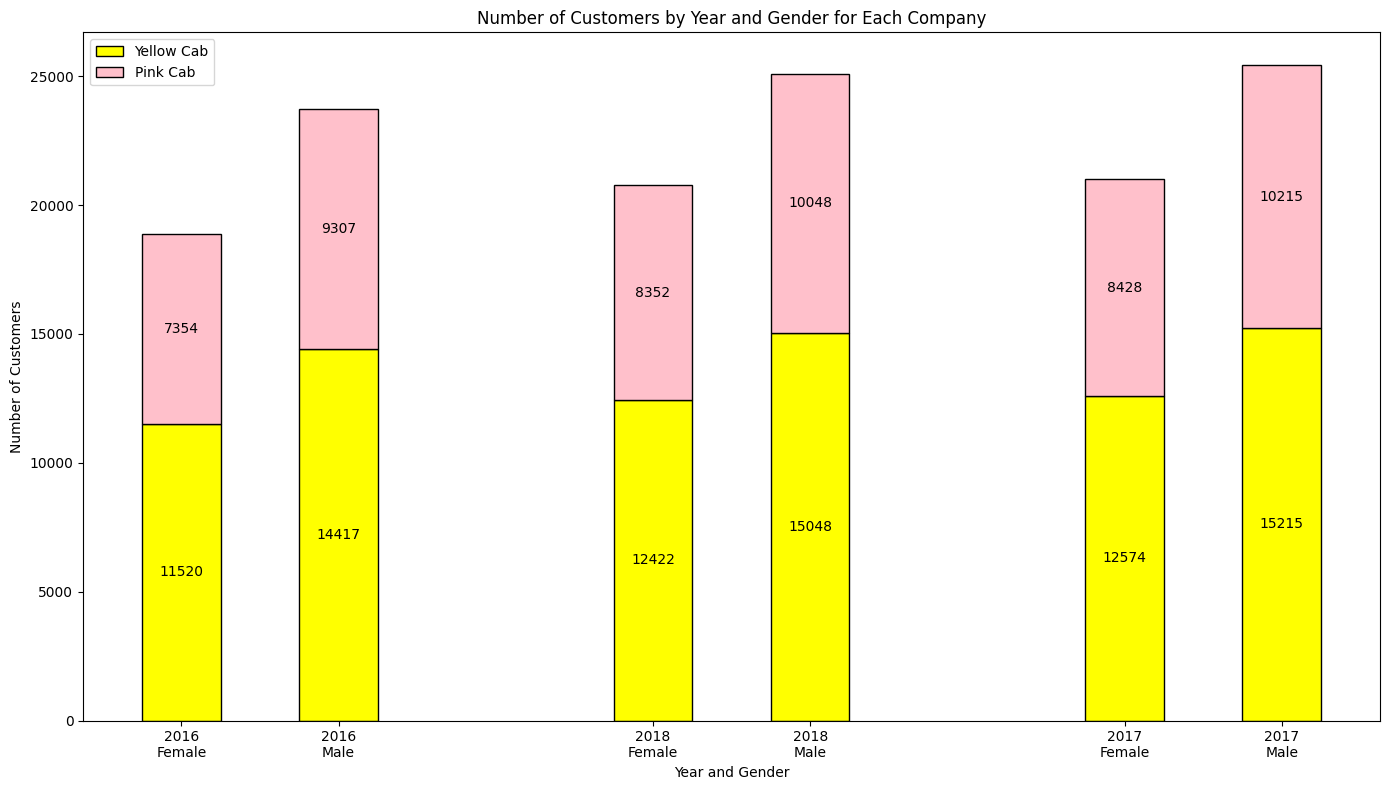

In [ ]:
labels = ['Female', 'Male']

# Plotting
fig, ax = plt.subplots(figsize=(14, 8))

colors = {'Pink Cab': 'pink', 'Yellow Cab': 'yellow'}

years = full['Year'].unique()
genders = labels

bar_width = 0.5
bar_positions = []

# Loop over each year and plot the bars for each gender
for i, year in enumerate(years):
    for j, gender in enumerate(genders):
        x_position = i * (len(genders) + 1) + j  # calculate the x position
        bar_positions.append(x_position)

        height_yellow = pivot_table.loc[(year, gender), 'Yellow Cab'] if (year, gender) in pivot_table.index else 0
        height_pink = pivot_table.loc[(year, gender), 'Pink Cab'] if (year, gender) in pivot_table.index else 0

        # Plot bars for Yellow Cab (bottom part)
        ax.bar(x_position, height_yellow, width=bar_width, color=colors['Yellow Cab'], edgecolor='black')
        # Plot bars for Pink Cab (stacked on top)
        ax.bar(x_position, height_pink, width=bar_width, color=colors['Pink Cab'], bottom=height_yellow, edgecolor='black')

        # Annotate values on the bars
        if height_yellow > 0:
            ax.text(x_position, height_yellow / 2, str(height_yellow), ha='center', va='center')
        if height_pink > 0:
            ax.text(x_position, height_yellow + height_pink / 2, str(height_pink), ha='center', va='center')

# Set the labels for the x-axis
ax.set_xticks([i * (len(genders) + 1) + len(genders) / 2 - 0.5 for i in range(len(years))])
ax.set_xticklabels([str(year) for year in years])

# Add custom x-tick labels for each bar
ax.set_xticks(bar_positions)
custom_labels = [f'{year}\n{gender}' for year in years for gender in genders]
ax.set_xticklabels(custom_labels)

# Set labels and title
ax.set_xlabel('Year and Gender')
ax.set_ylabel('Number of Customers')
ax.set_title('Number of Customers by Year and Gender for Each Company')
ax.legend(['Yellow Cab', 'Pink Cab'])

plt.tight_layout()
plt.show()



*   Yellow Cab are more popular in both gender than Pink Cab.
*   Since both companies acquired more users over years, their total number of customers is increasing.



### Each gender group's contribution to the company profit

In [ ]:
profit_gender_groups = full.groupby(['Year', 'Gender', 'Company'])['Profit_of_Trip'].sum().reset_index()

total_profit = full.groupby(['Year', 'Company'])['Profit_of_Trip'].sum().reset_index()
total_profit.rename(columns={'Profit_of_Trip': 'Total_Profit'}, inplace=True)

# Merge the total profit with the profit by age group
merged_profit = profit_gender_groups.merge(total_profit, on=['Year', 'Company'])

# Calculate the contribution of each age group to the total profit
merged_profit['Contribution'] = merged_profit['Profit_of_Trip'] / merged_profit['Total_Profit']

# Sort the results
result = merged_profit.sort_values(by=['Year', 'Company', 'Gender']).reset_index(drop=True)
result

,Year,Gender,Company,Profit_of_Trip,Total_Profit,Contribution
0,2016,Female,Pink Cab,736301.65,1713511.22,0.43
1,2016,Male,Pink Cab,977209.57,1713511.22,0.57
2,2016,Female,Yellow Cab,5581321.48,13926995.43,0.40
3,2016,Male,Yellow Cab,8345673.95,13926995.43,0.60
4,2017,Female,Pink Cab,896924.98,2033654.91,0.44
5,2017,Male,Pink Cab,1136729.93,2033654.91,0.56
6,2017,Female,Yellow Cab,6904150.31,16575977.97,0.42
7,2017,Male,Yellow Cab,9671827.66,16575977.97,0.58
8,2018,Female,Pink Cab,697306.06,1560162.19,0.45
9,2018,Male,Pink Cab,862856.12,1560162.19,0.55


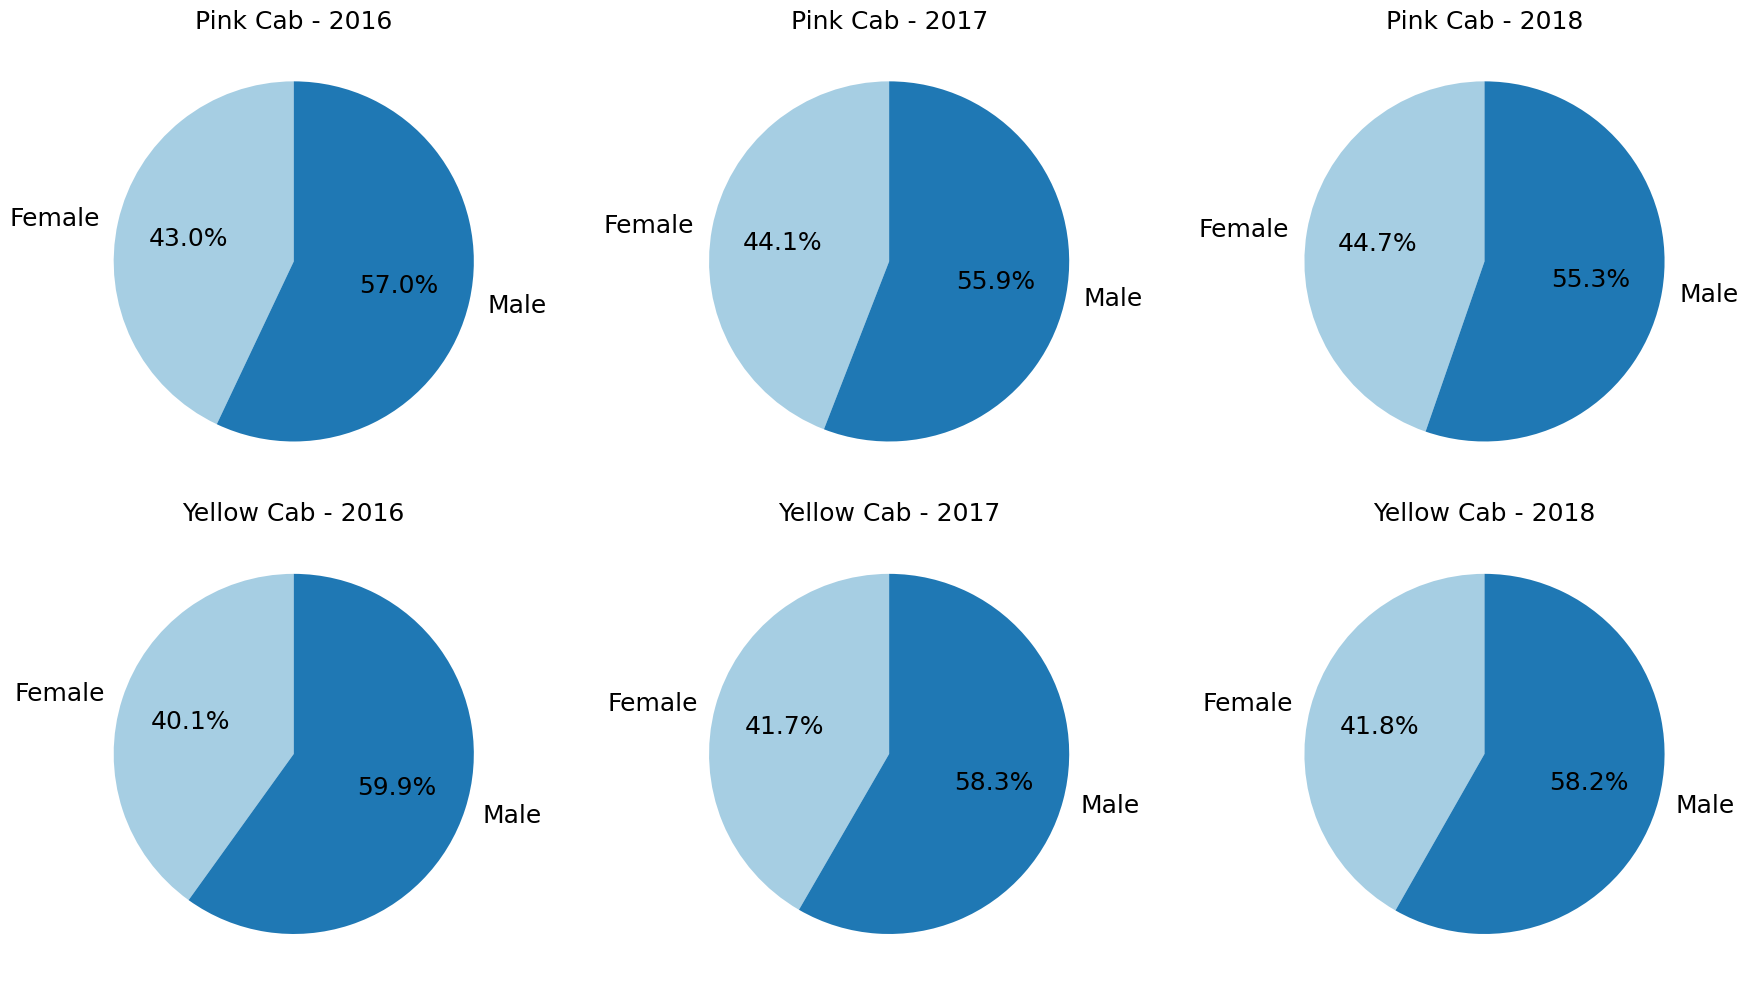

In [ ]:
pivot_table = result.pivot_table(index=['Year', 'Company'],
                                 columns='Gender',
                                 values='Contribution',
                                 fill_value=0)

# Plotting
fig, axs = plt.subplots(2, 3, figsize=(18, 10))

companies = ['Pink Cab', 'Yellow Cab']
years = [2016, 2017, 2018]
genders = labels

for i, company in enumerate(companies):
    for j, year in enumerate(years):
        ax = axs[i, j]
        contributions = pivot_table.loc[(year, company)]
        contributions.plot(kind='pie', labels=contributions.index, autopct='%1.1f%%',
                           ax=ax, startangle=90,
                           colors=plt.cm.Paired.colors,
                           textprops={'fontsize': 18})
        ax.set_ylabel('')
        ax.set_title(f'{company} - {year}', fontsize = 18)

plt.tight_layout()
plt.show()



*   The profit contribution distribution of two genders is similar in both companies.
*   Pink Cab and Yellow Cab all have less profit from male customers and more profit from female customers over years.



## 7) For different income group, what cab company they choose?

In [ ]:
full['Income_(USD/Month)'].min()

2000

In [ ]:
full['Income_(USD/Month)'].max()

35000

In [33]:
bins = [2000, 5000, 20000, float('inf')]
labels = ['low: < 5000', 'middle: 5000 - 20000', 'high: > 20000']

# Create income groups
full['income_groups'] = pd.cut(full['Income_(USD/Month)'], bins=bins, labels=labels, right=False)

customer_income_groups = full.groupby(['Company', 'income_groups'])['Customer_ID'].nunique().reset_index()
customer_income_groups.rename(columns={'Customer_ID': 'Number_Customers'}, inplace=True)
customer_income_groups

,Company,income_groups,Number_Customers
0,Pink Cab,low: < 5000,3896
1,Pink Cab,middle: 5000 - 20000,18979
2,Pink Cab,high: > 20000,9455
3,Yellow Cab,low: < 5000,4848
4,Yellow Cab,middle: 5000 - 20000,23543
5,Yellow Cab,high: > 20000,11505


In [ ]:
pivot_table = customer_income_groups.pivot_table(index=['Company'],
                                              columns='income_groups',
                                              values='Number_Customers',
                                              fill_value=0)
pivot_table = pivot_table.transpose()
pivot_table

Company,Pink Cab,Yellow Cab
income_groups,,
low: < 5000,3896,4848
middle: 5000 - 20000,18979,23543
high: > 20000,9455,11505


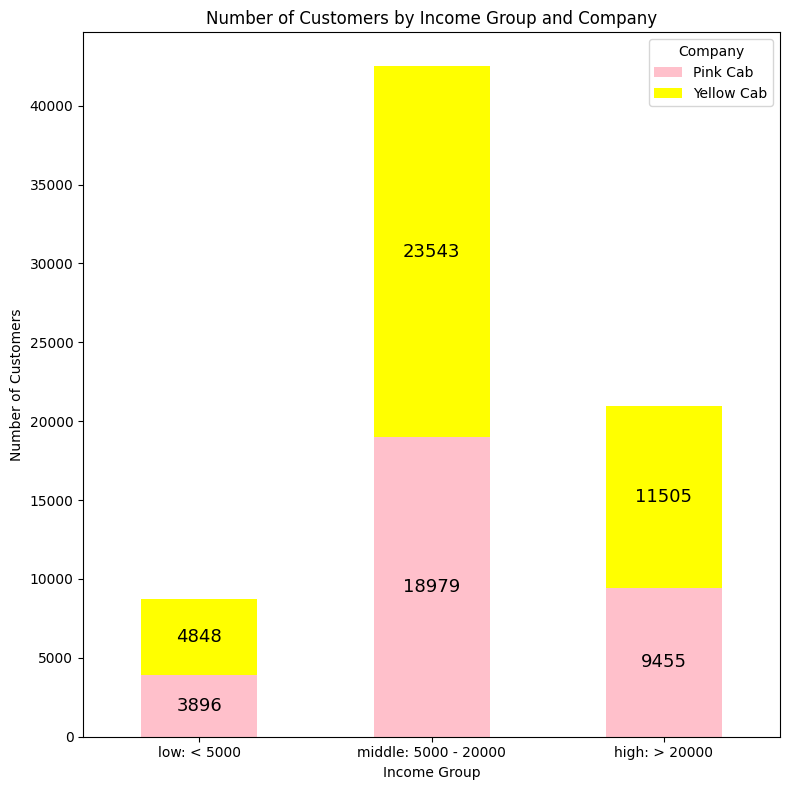

In [ ]:
# Plot the stacked bar chart
ax = pivot_table.plot(kind='bar', stacked=True, figsize=(8, 8), color=['pink', 'yellow'])

# Set labels and title
ax.set_xlabel('Income Group')
ax.set_ylabel('Number of Customers')
ax.set_title('Number of Customers by Income Group and Company')
ax.legend(title='Company')

# Add value annotations to the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height / 2, f'{int(height)}', ha='center', va='center', fontsize=13, color='black')

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



*   Most customer in both companies are from middle income group (5000 – 20000 USD).
*   Yellow Cab is popular in all income groups.



### Each income group's contribution to the company profit

In [ ]:
profit_income_groups = full.groupby(['Year', 'income_groups', 'Company'])['Profit_of_Trip'].sum().reset_index()

total_profit = full.groupby(['Year', 'Company'])['Profit_of_Trip'].sum().reset_index()
total_profit.rename(columns={'Profit_of_Trip': 'Total_Profit'}, inplace=True)

# Merge the total profit with the profit by age group
merged_profit = profit_income_groups.merge(total_profit, on=['Year', 'Company'])

# Calculate the contribution of each age group to the total profit
merged_profit['Contribution'] = merged_profit['Profit_of_Trip'] / merged_profit['Total_Profit']

# Sort the results
result = merged_profit.sort_values(by=['Year', 'Company', 'income_groups']).reset_index(drop=True)
result

,Year,income_groups,Company,Profit_of_Trip,Total_Profit,Contribution
0,2016,low: < 5000,Pink Cab,197299.92,1713511.22,0.12
1,2016,middle: 5000 - 20000,Pink Cab,1013416.74,1713511.22,0.59
2,2016,high: > 20000,Pink Cab,502794.56,1713511.22,0.29
3,2016,low: < 5000,Yellow Cab,1631324.76,13926995.43,0.12
4,2016,middle: 5000 - 20000,Yellow Cab,8293399.85,13926995.43,0.60
5,2016,high: > 20000,Yellow Cab,4002270.82,13926995.43,0.29
6,2017,low: < 5000,Pink Cab,249614.82,2033654.91,0.12
7,2017,middle: 5000 - 20000,Pink Cab,1185078.33,2033654.91,0.58
8,2017,high: > 20000,Pink Cab,598961.75,2033654.91,0.29
9,2017,low: < 5000,Yellow Cab,1915453.02,16575977.97,0.12


In [ ]:
pivot_table = result.pivot_table(index=['Year', 'income_groups'],
                                                 columns='Company',
                                                 values='Contribution',
                                                 fill_value=0)

pivot_table

Company                    Pink Cab  Yellow Cab
Year income_groups                             
2016 low: < 5000               0.12        0.12
     middle: 5000 - 20000      0.59        0.60
     high: > 20000             0.29        0.29
2017 low: < 5000               0.12        0.12
     middle: 5000 - 20000      0.58        0.59
     high: > 20000             0.29        0.29
2018 low: < 5000               0.12        0.11
     middle: 5000 - 20000      0.59        0.60
     high: > 20000             0.29        0.29

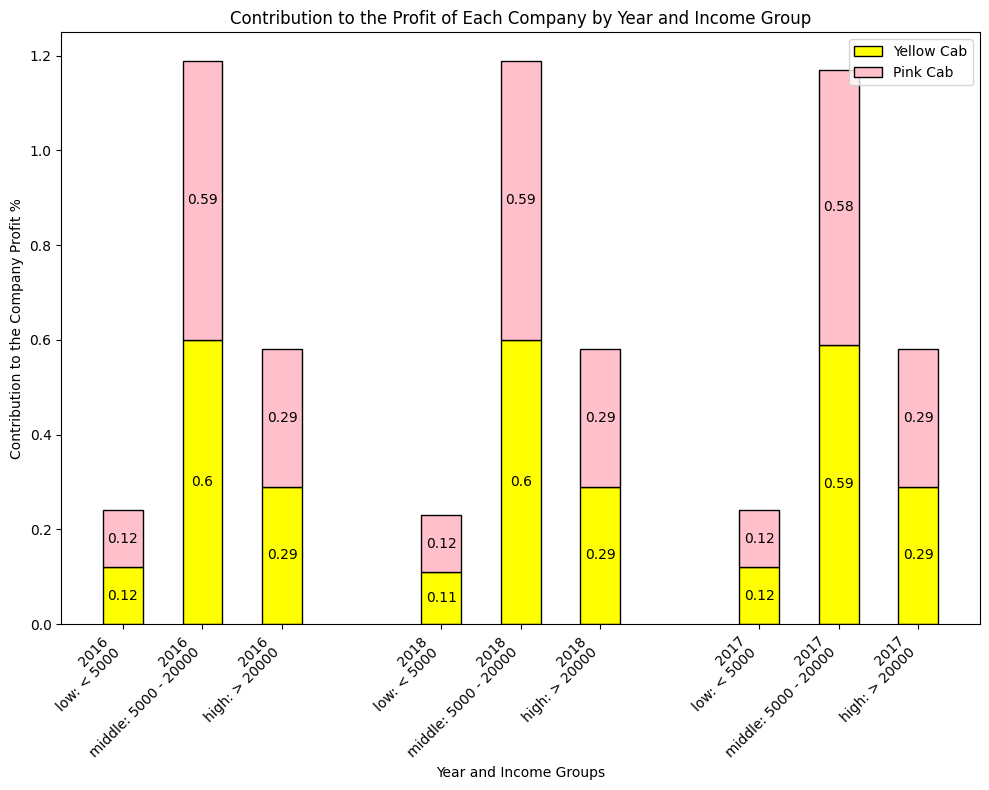

In [ ]:
# Plotting
fig, ax = plt.subplots(figsize=(10, 8))

colors = {'Pink Cab': 'pink', 'Yellow Cab': 'yellow'}

years = full['Year'].unique()
income_groups = labels

bar_width = 0.5
bar_positions = []

# Loop over each year and plot the bars for each gender
for i, year in enumerate(years):
    for j, income in enumerate(income_groups):
        x_position = i * (len(income_groups) + 1) + j  # calculate the x position
        bar_positions.append(x_position)

        height_yellow = round(pivot_table.loc[(year, income), 'Yellow Cab'], 2) if (year, income) in pivot_table.index else 0
        height_pink = round(pivot_table.loc[(year, income), 'Pink Cab'], 2) if (year, income) in pivot_table.index else 0

        # Plot bars for Yellow Cab (bottom part)
        ax.bar(x_position, height_yellow, width=bar_width, color=colors['Yellow Cab'], edgecolor='black')
        # Plot bars for Pink Cab (stacked on top)
        ax.bar(x_position, height_pink, width=bar_width, color=colors['Pink Cab'], bottom=height_yellow, edgecolor='black')

        # Annotate values on the bars
        if height_yellow > 0:
            ax.text(x_position, height_yellow / 2, str(height_yellow), ha='center', va='center')
        if height_pink > 0:
            ax.text(x_position, height_yellow + height_pink / 2, str(height_pink), ha='center', va='center')

# Set the labels for the x-axis
ax.set_xticks([i * (len(income_groups) + 1) + len(income_groups) / 2 - 0.5 for i in range(len(income_groups))])
ax.set_xticklabels([str(year) for year in years])

# Add custom x-tick labels for each bar
ax.set_xticks(bar_positions)
custom_labels = [f'{year}\n{income}' for year in years for income in income_groups]
ax.set_xticklabels(custom_labels, rotation=45, ha='right')

# Set labels and title
ax.set_xlabel('Year and Income Groups')
ax.set_ylabel('Contribution to the Company Profit %')
ax.set_title('Contribution to the Profit of Each Company by Year and Income Group')
ax.legend(['Yellow Cab', 'Pink Cab'])

plt.tight_layout()
plt.show()



*   The profit contribution of different income groups has similar pattern in three years.
*   More than half of yearly profit in both companies are from middle income group (5000 – 20000 USD).



## View full datadet we created (master dataset)

In [34]:
full.head()

,Transaction_ID,Customer_ID,Payment_Mode,Gender,Age,Income_(USD/Month),Date_of_Travel,Company,City,KM_Travelled,...,Cost_of_Trip,Population,Users,Profit_of_Trip,Price_per_KM,Cost_per_KM,Year,Month,Age_Group,income_groups
0,10000011,29290,Card,Male,28,10813,2016-01-08,Pink Cab,ATLANTA GA,30.45,...,313.6350,"814,885","24,701",57.3150,12.182266,10.30,2016,1,26-40,middle: 5000 - 20000
1,10351127,29290,Cash,Male,28,10813,2018-07-21,Yellow Cab,ATLANTA GA,26.19,...,317.4228,"814,885","24,701",281.2772,22.859870,12.12,2018,7,26-40,middle: 5000 - 20000
2,10412921,29290,Card,Male,28,10813,2018-11-23,Yellow Cab,ATLANTA GA,42.55,...,597.4020,"814,885","24,701",194.6480,18.614571,14.04,2018,11,26-40,middle: 5000 - 20000
3,10000012,27703,Card,Male,27,9237,2016-01-06,Pink Cab,ATLANTA GA,28.62,...,334.8540,"814,885","24,701",23.6660,12.526904,11.70,2016,1,26-40,middle: 5000 - 20000
4,10320494,27703,Card,Male,27,9237,2018-04-21,Yellow Cab,ATLANTA GA,36.38,...,467.1192,"814,885","24,701",253.9808,19.821330,12.84,2018,4,26-40,middle: 5000 - 20000


In [35]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction_ID      359392 non-null  int64         
 1   Customer_ID         359392 non-null  int64         
 2   Payment_Mode        359392 non-null  object        
 3   Gender              359392 non-null  object        
 4   Age                 359392 non-null  int64         
 5   Income_(USD/Month)  359392 non-null  int64         
 6   Date_of_Travel      359392 non-null  datetime64[ns]
 7   Company             359392 non-null  object        
 8   City                359392 non-null  object        
 9   KM_Travelled        359392 non-null  float64       
 10  Price_Charged       359392 non-null  float64       
 11  Cost_of_Trip        359392 non-null  float64       
 12  Population          359392 non-null  object        
 13  Users               359392 no

## Recommendation

We evaluated both companies from different perspective, here are the key insights:

*   **Seasonality of demand and profit**: There are seasonality appeared in both demand and profit. Demand increases and reach peak at the end of the year. Profit increased in second and fourth quarter.
*   **Profit analysis**: The yearly profit of Yellow Cab is about 7 times of yearly profit of Pink Cab.
*   **Price Charged vs. Cost per KM**: The price charged per KM remains unchanged but the cost per PM increases, which lead to drop in yearly profit in 2018.
*   **Customer Reach in different cities & profit contribution**: Both companies has higher user coverage in Pittsburgh. Seattle contributes most to the yearly profit of both companies.
*   **Age wise customer reach & profit contribution**: Most customers in both companies are in 26-40 age groups, and they are the main contributor to the profit. Yellow Cab is more popular in all age groups.
*   **Gender wise analysis**: There are more male customers than female customers. Yellow Cab is more popular in both gender.
*   **Income wise customer reach & profit contribution**: Most customers in both companies are from middle income group (5000 - 20000), and they are the main contributor to the profit. Yellow Cab is more popular in all income groups.

From our finding, we recommend XYZ firm to invest in **Yellow Cab**. And there are more potential users in the market, we expect a profit to grow as we acquire more customers.
